# 3. Evaluacion modelos de clasificacion binaria datos estandarizados incluyendo variable ciclo
***

### Caso de estudio #1


### Tecnicas de ajuste de los datos y modelos:

| Ingeniería de datos       | Si / No     |
| :-------                  | :------:    |
| Escalado de datos         | Si          |
| Ajuste de hiperparametros | Si          |
| Sobremuestreo             | No          |
| Ajuste de pesos de clase  | No          |
| Incluye variable ciclo    | Si          |


### Cargar librerias

In [1]:
# librerias
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import pandas_profiling
np.random.seed(9999) 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from plot_metric.functions import BinaryClassification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler



### Funciones

In [2]:
# BINARIA funcion para generar matriz de confusion y medidas de desempeño del modelos clasificacion binarios
def model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
    print('\n')
    print("MATRIZ DE CONFUSION")
    print('\n')
    matriz = confusion_matrix(label_test, label_pred)
    #print(matriz)
    classes = ["Funcional","Falla potencial"]
    cm = ConfusionMatrix(modelo, classes=classes, label_encoder={0:"Funcional", 1:"Falla Potencial"})
    cm.fit(data_train, label_train)
    cm.score(data_test, label_test)
    cm.show()
    # Medidas de desempeño del modelo
    print('\n')
    print("MEDIDAS DE DESEMPEÑO DEL MODELO")
    print('\n')
    print('Exactitud - Accuracy: {}'.format(modelo.score(data_test, label_test)))
    print('ROC AUC: {}'.format (metrics.roc_auc_score(label_test, label_pred)))
    print('-'*60)
    print('Precisión por clase: {}'.format(metrics.precision_score(label_test, label_pred, average=None)))
    print('Sensibilidad - Recall por clase: {}'.format(metrics.recall_score(label_test, label_pred, average=None)))
    print('F1 por clase: {}'.format(metrics.f1_score(label_test, label_pred, average=None)))
    print('-'*60)
    print('F1 Macro: {}'.format(metrics.f1_score(label_test, label_pred, average='macro')))
    print('F1 Micro: {}'.format(metrics.f1_score(label_test, label_pred, average='micro')))
    print('F1 Weighted: {}'.format(metrics.f1_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Sensibilidad - Recall Macro: {}'.format(metrics.recall_score(label_test, label_pred, average='macro')))
    print('Sensibilidad - Recall Micro: {}'.format(metrics.recall_score(label_test, label_pred, average='micro')))
    print('Sensibilidad - Recall Weighted: {}'.format(metrics.recall_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Precisión Macro: {}'.format(metrics.precision_score(label_test, label_pred, average='macro')))
    print('Precisión Micro: {}'.format(metrics.precision_score(label_test, label_pred, average='micro')))
    print('Precisión Weighted: {}'.format(metrics.precision_score(label_test, label_pred, average='weighted')))
    
    TP = matriz[1][1]
    TN = matriz[0][0]
    FP = matriz[0][1]
    FN = matriz[1][0]
    print('-'*60)
    print('Verdaderos positivos - True Positives:', TP)
    print('Verdaderos negativos - True Negatives:', TN)
    print('Falsos positivos - False Positives:', FP)
    print('Falsos negativos - False Negatives:', FN)
        # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
        # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
        # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
    conf_specificity = (TN / float(TN + FN))
        # calculate precision
    conf_precision = (TP / float(TP + FP))
        # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        # calculate FPR tasa de falsos positivos
    conf_FPR = 1 - conf_specificity
    print('-'*60)
    print(f'Error de clasificacion: {round(conf_misclassification,3)}') 
    print(f'Especificidad - Specificity: {round(conf_specificity,3)}') 
    print(f'Tasa de falsos positivos FPR: {round(conf_FPR,3)}')
    print('-'*60)
   
    print(classification_report(label_test, label_pred))
    # curva ROC clasificacion binaria
    bc = BinaryClassification(label_test, label_pred, labels=["Class 0", "Class 1"])
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    print('\n')
    print("CURVA ROC")
    plt.show()

In [4]:
# ruta para grabar medidas de desempeño
ruta3 = "D:/alexh/Documents/Maestria en estadistica/proyecto de grado/cuadernos proyecto/Nasa Turbo Fan/Modelos 3.xlsx"
writer = pd.ExcelWriter(ruta3, engine='openpyxl')

### Preparar datos agil

In [5]:
columns=["id","ciclo","set1","set2","set3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]
train=pd.read_csv("train_FD001.txt",sep=" ",names=columns)
test=pd.read_csv("test_FD001.txt",sep=" ",names=columns)
rul=pd.read_csv("RUL_FD001.txt",sep=" ",header=None)
train.drop(['sensor22','sensor23'], axis=1, inplace=True)
test.drop(['sensor22','sensor23'], axis=1, inplace=True)
rul.drop([1], axis=1, inplace=True)
rul.columns = ['ttf']
rul2=pd.DataFrame(train.groupby('id')['ciclo'].max()).reset_index()
rul2.columns = ['id', 'falla']
train= train.merge(rul2, on=['id'], how='left')
train['ttf'] = train['falla'] - train['ciclo']
train.drop('falla', axis=1, inplace=True)
train['clase1']=np.where(train['ttf'] <= 30, 1, 0)
train['clase2']=train['clase1']
train.loc[train['ttf']<=15, 'clase2'] =2
rul3=pd.DataFrame(test.groupby('id')['ciclo'].max()).reset_index()
rul3.columns = ['id', 'falla']
rul['id'] = rul.index + 1
rul['falla'] = rul3['falla'] + rul['ttf']
rul.drop('ttf', axis=1, inplace=True)
test=test.merge(rul, on=['id'], how='left')
test['ttf'] = test['falla'] - test['ciclo']
test.drop('falla', axis=1, inplace=True)
test['clase1']=np.where(test['ttf'] <= 30, 1, 0)
test['clase2']=test['clase1']
test.loc[test['ttf']<=15, 'clase2'] =2


## Incluimos la variable ciclo

In [6]:
# incluyendo la variable ciclo
data_train=train.iloc[:,np.r_[1:26]]
label_train=train.iloc[:,27]
data_test=test.iloc[:,np.r_[1:26]]
label_test=test.iloc[:,27]
label_train2=train.iloc[:,28]
label_test2=test.iloc[:,28]

## Estandarizar datos

In [8]:
data_train.head()

,ciclo,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
data_test.head()

,ciclo,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [10]:
scaled_features = StandardScaler().fit_transform(data_train.values)

In [11]:
scaled_features_df = pd.DataFrame(scaled_features, index=data_train.index, columns=data_train.columns)

In [12]:
scaled_features_df.head()

,ciclo,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,-1.565170,-0.315980,-1.372953,0.0,0.0,-1.721725,-0.134255,-0.925936,-1.0,0.141683,...,0.334262,-1.058890,-0.269071,-0.603816,-1.0,-0.781710,0.0,0.0,1.348493,1.194427
1,-1.550652,0.872722,-1.031720,0.0,0.0,-1.061780,0.211528,-0.643726,-1.0,0.141683,...,1.174899,-0.363646,-0.642845,-0.275852,-1.0,-0.781710,0.0,0.0,1.016528,1.236922
2,-1.536134,-1.961874,1.015677,0.0,0.0,-0.661813,-0.413166,-0.525953,-1.0,0.141683,...,1.364721,-0.919841,-0.551629,-0.649144,-1.0,-2.073094,0.0,0.0,0.739891,0.503423
3,-1.521616,0.324090,-0.008022,0.0,0.0,-0.661813,-1.261314,-0.784831,-1.0,0.141683,...,1.961302,-0.224597,-0.520176,-1.971665,-1.0,-0.781710,0.0,0.0,0.352598,0.777792
4,-1.507098,-0.864611,-0.690488,0.0,0.0,-0.621816,-1.251528,-0.301518,-1.0,0.141683,...,1.052871,-0.780793,-0.521748,-0.339845,-1.0,-0.136018,0.0,0.0,0.463253,1.059552


In [13]:
scaled_features_df.describe()

,ciclo,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,2.063100e+04,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04,2.063100e+04,20631.0,2.063100e+04,...,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,20631.0,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04
mean,6.161520e-16,-9.880129e-18,6.097267e-16,0.0,0.0,6.258537e-14,-4.962530e-14,8.308134e-16,-1.0,-6.466414e-12,...,-1.199984e-13,3.503748e-13,2.704422e-15,-3.236684e-14,-1.0,1.863604e-14,0.0,0.0,4.174604e-14,2.419665e-14
std,1.000024e+00,1.000024e+00,1.000024e+00,0.0,0.0,1.000024e+00,1.000024e+00,1.000024e+00,0.0,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,0.0,1.000024e+00,0.0,0.0,1.000024e+00,1.000024e+00
min,-1.565170e+00,-3.973523e+00,-2.055419e+00,0.0,0.0,-2.941625e+00,-3.177804e+00,-2.964737e+00,-1.0,-7.057993e+00,...,-3.692663e+00,-3.005574e+00,-2.296780e+00,-3.126205e+00,-1.0,-3.364479e+00,0.0,0.0,-3.741634e+00,-3.653688e+00
25%,-8.247448e-01,-6.817340e-01,-6.904875e-01,0.0,0.0,-7.118085e-01,-6.953381e-01,-7.303888e-01,-1.0,1.416833e-01,...,-6.148450e-01,-7.807925e-01,-5.508429e-01,-7.264689e-01,-1.0,-7.817098e-01,0.0,0.0,-6.432961e-01,-6.273114e-01
50%,-6.980124e-02,4.055368e-03,-8.021809e-03,0.0,0.0,-8.186036e-02,-6.901297e-02,-9.930481e-02,-1.0,1.416833e-01,...,9.020580e-02,-8.554830e-02,-1.684195e-01,-8.653932e-02,-1.0,-1.360176e-01,0.0,0.0,7.596096e-02,7.570228e-02
75%,6.851423e-01,6.898448e-01,1.015677e+00,0.0,0.0,6.380804e-01,6.290786e-01,6.245530e-01,-1.0,1.416833e-01,...,7.274632e-01,6.096959e-01,2.389047e-01,6.253823e-01,-1.0,5.096747e-01,0.0,0.0,7.398906e-01,7.122022e-01
max,3.675880e+00,3.981634e+00,2.039375e+00,0.0,0.0,3.697829e+00,4.303846e+00,3.617202e+00,-1.0,1.416833e-01,...,2.666353e+00,6.449748e+00,7.861686e+00,3.803699e+00,-1.0,4.383828e+00,0.0,0.0,3.395609e+00,3.036489e+00


In [14]:
data_train=scaled_features_df

In [16]:
data_train.head()

,ciclo,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,-1.565170,-0.315980,-1.372953,0.0,0.0,-1.721725,-0.134255,-0.925936,-1.0,0.141683,...,0.334262,-1.058890,-0.269071,-0.603816,-1.0,-0.781710,0.0,0.0,1.348493,1.194427
1,-1.550652,0.872722,-1.031720,0.0,0.0,-1.061780,0.211528,-0.643726,-1.0,0.141683,...,1.174899,-0.363646,-0.642845,-0.275852,-1.0,-0.781710,0.0,0.0,1.016528,1.236922
2,-1.536134,-1.961874,1.015677,0.0,0.0,-0.661813,-0.413166,-0.525953,-1.0,0.141683,...,1.364721,-0.919841,-0.551629,-0.649144,-1.0,-2.073094,0.0,0.0,0.739891,0.503423
3,-1.521616,0.324090,-0.008022,0.0,0.0,-0.661813,-1.261314,-0.784831,-1.0,0.141683,...,1.961302,-0.224597,-0.520176,-1.971665,-1.0,-0.781710,0.0,0.0,0.352598,0.777792
4,-1.507098,-0.864611,-0.690488,0.0,0.0,-0.621816,-1.251528,-0.301518,-1.0,0.141683,...,1.052871,-0.780793,-0.521748,-0.339845,-1.0,-0.136018,0.0,0.0,0.463253,1.059552


In [17]:
scaled_features_test = StandardScaler().fit_transform(data_test.values)

In [18]:
scaled_features_test_df = pd.DataFrame(scaled_features_test, index=data_test.index, columns=data_test.columns)

In [19]:
scaled_features_test_df.head()

,ciclo,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,-1.429375,1.049295,1.005927,0.0,0.0,1.359276,-0.561495,-0.975674,-1.0,0.17566,...,-0.049542,-0.720590,-1.315031,-0.711659,-1.0,-0.463406,0.0,0.0,-0.229408,0.448866
1,-1.410527,-1.220748,-1.034755,0.0,0.0,-1.908502,0.070116,-1.392836,-1.0,0.17566,...,0.736727,-0.193647,0.065977,-1.570037,-1.0,0.347276,0.0,0.0,0.899934,0.664042
2,-1.391679,0.141278,0.325700,0.0,0.0,-0.037636,-0.231698,-0.507676,-1.0,0.17566,...,0.397202,-0.720590,-0.868436,0.629340,-1.0,0.347276,0.0,0.0,1.323438,0.961247
3,-1.372830,1.911912,-0.014414,0.0,0.0,-0.087526,-0.795350,0.251888,-1.0,0.17566,...,-0.657113,-0.369295,-0.593609,-1.177045,-1.0,-1.274088,0.0,0.0,0.758766,0.451244
4,-1.353982,0.640688,-0.014414,0.0,0.0,0.087088,-0.181729,-0.420954,-1.0,0.17566,...,0.718857,-0.720590,-0.923402,-0.784053,-1.0,-2.084769,0.0,0.0,0.688182,0.918450


In [20]:
data_test=scaled_features_test_df
data_test.head()

,ciclo,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,-1.429375,1.049295,1.005927,0.0,0.0,1.359276,-0.561495,-0.975674,-1.0,0.17566,...,-0.049542,-0.720590,-1.315031,-0.711659,-1.0,-0.463406,0.0,0.0,-0.229408,0.448866
1,-1.410527,-1.220748,-1.034755,0.0,0.0,-1.908502,0.070116,-1.392836,-1.0,0.17566,...,0.736727,-0.193647,0.065977,-1.570037,-1.0,0.347276,0.0,0.0,0.899934,0.664042
2,-1.391679,0.141278,0.325700,0.0,0.0,-0.037636,-0.231698,-0.507676,-1.0,0.17566,...,0.397202,-0.720590,-0.868436,0.629340,-1.0,0.347276,0.0,0.0,1.323438,0.961247
3,-1.372830,1.911912,-0.014414,0.0,0.0,-0.087526,-0.795350,0.251888,-1.0,0.17566,...,-0.657113,-0.369295,-0.593609,-1.177045,-1.0,-1.274088,0.0,0.0,0.758766,0.451244
4,-1.353982,0.640688,-0.014414,0.0,0.0,0.087088,-0.181729,-0.420954,-1.0,0.17566,...,0.718857,-0.720590,-0.923402,-0.784053,-1.0,-2.084769,0.0,0.0,0.688182,0.918450


In [21]:
data_test.describe()

,ciclo,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,1.309600e+04,1.309600e+04,1.309600e+04,13096.0,13096.0,1.309600e+04,1.309600e+04,1.309600e+04,13096.0,1.309600e+04,...,1.309600e+04,1.309600e+04,1.309600e+04,1.309600e+04,13096.0,1.309600e+04,13096.0,13096.0,1.309600e+04,1.309600e+04
mean,8.701381e-17,-5.801204e-17,-5.282376e-16,0.0,0.0,-6.195294e-14,2.353422e-14,-2.272926e-14,-1.0,-7.341916e-13,...,-3.841309e-14,3.659929e-12,1.490161e-14,-2.006011e-14,-1.0,6.606336e-15,0.0,0.0,-1.198768e-14,4.451133e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,0.0,0.0,1.000038e+00,1.000038e+00,1.000038e+00,0.0,1.000038e+00,...,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,0.0,1.000038e+00,0.0,0.0,1.000038e+00,1.000038e+00
min,-1.429375e+00,-3.717796e+00,-2.055096e+00,0.0,0.0,-3.355304e+00,-3.809492e+00,-3.042045e+00,-1.0,-5.692817e+00,...,-4.231060e+00,-3.179658e+00,-2.988533e+00,-3.207504e+00,-1.0,-2.895451e+00,0.0,0.0,-4.111524e+00,-4.759351e+00
25%,-8.262354e-01,-6.759377e-01,-6.946412e-01,0.0,0.0,-6.924392e-01,-6.994096e-01,-7.155089e-01,-1.0,1.756600e-01,...,-6.571126e-01,-7.205902e-01,-6.515191e-01,-6.978700e-01,-1.0,-4.634059e-01,0.0,0.0,-6.529120e-01,-6.436588e-01
50%,-1.477035e-01,5.075357e-03,-1.441380e-02,0.0,0.0,-3.763635e-02,-2.182741e-02,-4.416261e-02,-1.0,1.756600e-01,...,5.767683e-02,-1.799933e-02,-5.475118e-02,-3.254138e-02,-1.0,3.472758e-01,0.0,0.0,5.292715e-02,4.110114e-02
75%,6.816133e-01,6.860884e-01,1.005927e+00,0.0,0.0,6.608200e-01,6.522570e-01,6.451261e-01,-1.0,1.756600e-01,...,7.188570e-01,6.845916e-01,5.312199e-01,6.362346e-01,-1.0,3.472758e-01,0.0,0.0,6.881824e-01,6.878189e-01
max,4.262754e+00,3.546343e+00,2.366382e+00,0.0,0.0,4.552220e+00,3.887762e+00,4.279965e+00,-1.0,1.756600e-01,...,3.595884e+00,4.373194e+00,8.002597e+00,3.983562e+00,-1.0,3.590003e+00,0.0,0.0,3.652707e+00,3.639657e+00


## Modelos de clasificacion binaria datos estandarizados incluyendo variable ciclo

## Modelo Random Forest 

In [22]:
modelo1=RandomForestClassifier(random_state=0, n_estimators=10)
modelo1.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
label_pred1 = modelo1.predict(data_test)

In [24]:
# para evaluar cuales caracteristicas tiene mayor peso en el modelo
fi=modelo1.feature_importances_
fi

array([1.71743666e-02, 1.27163885e-02, 8.56555078e-03, 0.00000000e+00,
       0.00000000e+00, 2.57769133e-02, 1.89140805e-02, 5.98822882e-02,
       0.00000000e+00, 1.60436285e-05, 1.31573202e-01, 1.61602104e-02,
       6.01903763e-02, 0.00000000e+00, 2.66316709e-01, 9.72743876e-02,
       1.50576235e-02, 4.39850964e-02, 3.77909147e-02, 0.00000000e+00,
       4.72263590e-02, 0.00000000e+00, 0.00000000e+00, 6.42420437e-02,
       7.71374460e-02])

#### Evaluacion del modelo



MATRIZ DE CONFUSION




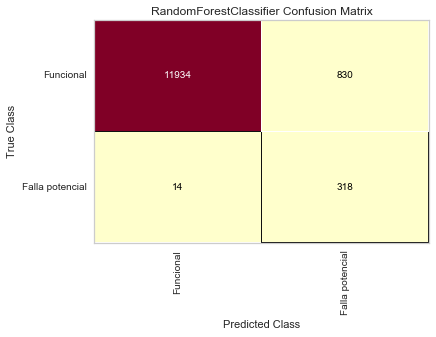



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9355528405620037
ROC AUC: 0.9464023439417336
------------------------------------------------------------
Precisión por clase: [0.99882826 0.27700348]
Sensibilidad - Recall por clase: [0.93497336 0.95783133]
F1 por clase: [0.96584655 0.42972973]
------------------------------------------------------------
F1 Macro: 0.6977881410060108
F1 Micro: 0.9355528405620037
F1 Weighted: 0.9522553194564328
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9464023439417337
Sensibilidad - Recall Micro: 0.9355528405620037
Sensibilidad - Recall Weighted: 0.9355528405620037
------------------------------------------------------------
Precisión Macro: 0.6379158700477913
Precisión Micro: 0.9355528405620037
Precisión Weighted: 0.9805290938841513
------------------------------------------------------------
Verdaderos positivos - True Positives: 318
Verdaderos negativos - True Negatives: 11934
Falsos positiv

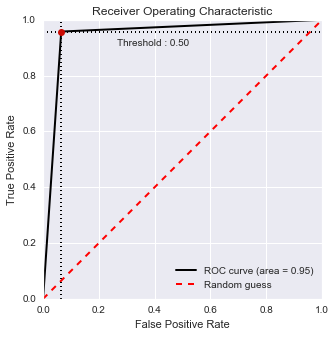

In [25]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo1, label_pred1)

In [26]:
# grabar las medidas de desempeño
report1 = classification_report(label_test, label_pred1, output_dict=True)
df = pd.DataFrame(report1).transpose()
df.to_excel(writer, sheet_name='Random Forest')
writer.save()

### Modelo Random Forest con Grid Search CV

In [29]:
model = RandomForestClassifier(random_state=0)
parameters= {'n_estimators': [10, 50, 100, 200, 300, 400],
             'max_features': ['log2', 'sqrt', 'auto'],
             'criterion': ['entropy', 'gini'],
             'max_depth': [2, 4, 6, 8, 10]                 
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=2, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)


Fitting 2 folds for each of 180 candidates, totalling 360 fits
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=200, total=   0.7s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=200, total=   0.7s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=300 
[CV]  criterion=entropy, 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.8min finished


Wall time: 7min 53s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [30]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 300}
0.9575880955843149
22


In [31]:
modelo1a= grid.best_estimator_
modelo1a.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
modelo1a= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
modelo1a.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
label_pred1a = modelo1a.predict(data_test)

In [29]:
# para evaluar cuales caracteristicas tiene mayor peso en el modelo
fi=modelo1a.feature_importances_
fi

array([2.46820834e-02, 9.40714930e-05, 4.30438208e-05, 0.00000000e+00,
       0.00000000e+00, 2.56678957e-02, 2.56402620e-02, 1.35264750e-01,
       0.00000000e+00, 9.34409306e-05, 1.07960143e-01, 9.56279918e-03,
       4.01590608e-02, 0.00000000e+00, 2.15522351e-01, 1.24669440e-01,
       1.34209364e-02, 3.09079555e-02, 7.51148608e-02, 0.00000000e+00,
       3.46717783e-02, 0.00000000e+00, 0.00000000e+00, 6.11456461e-02,
       7.53794820e-02])



MATRIZ DE CONFUSION




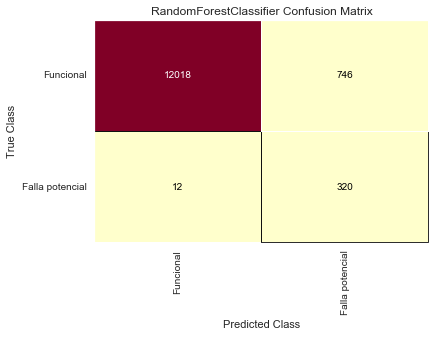



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9421197312156384
ROC AUC: 0.9527048966785349
------------------------------------------------------------
Precisión por clase: [0.99900249 0.30018762]
Sensibilidad - Recall por clase: [0.94155437 0.96385542]
F1 por clase: [0.96942809 0.45779685]
------------------------------------------------------------
F1 Macro: 0.713612470043574
F1 Micro: 0.9421197312156384
F1 Weighted: 0.9564575949274093
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9527048966785349
Sensibilidad - Recall Micro: 0.9421197312156384
Sensibilidad - Recall Weighted: 0.9421197312156384
------------------------------------------------------------
Precisión Macro: 0.6495950555131871
Precisión Micro: 0.9421197312156384
Precisión Weighted: 0.9812866615267656
------------------------------------------------------------
Verdaderos positivos - True Positives: 320
Verdaderos negativos - True Negatives: 12018
Falsos positivo

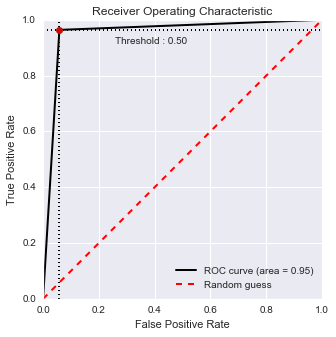

In [30]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo1a, label_pred1a)

In [32]:
report1a = classification_report(label_test, label_pred1a, output_dict=True)
df1a = pd.DataFrame(report1a).transpose()
df1a.to_excel(writer, sheet_name='Random Forest Grid')
writer.save()

## Clasificador Gausiano Naive Bayes

In [33]:
modelo2 = GaussianNB()
modelo2.fit(data_train, label_train);
label_pred2 = modelo2.predict(data_test)



MATRIZ DE CONFUSION




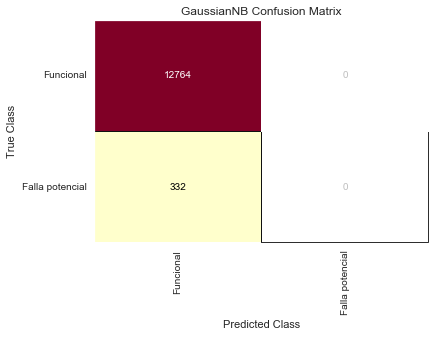



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9746487477092242
ROC AUC: 0.5
------------------------------------------------------------
Precisión por clase: [0.97464875 0.        ]
Sensibilidad - Recall por clase: [1. 0.]
F1 por clase: [0.98716164 0.        ]
------------------------------------------------------------
F1 Macro: 0.49358081979891727
F1 Micro: 0.9746487477092242
F1 Weighted: 0.9621358558206139
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.5
Sensibilidad - Recall Micro: 0.9746487477092242
Sensibilidad - Recall Weighted: 0.9746487477092242
------------------------------------------------------------
Precisión Macro: 0.4873243738546121
Precisión Micro: 0.9746487477092242
Precisión Weighted: 0.949940181411159
------------------------------------------------------------
Verdaderos positivos - True Positives: 0
Verdaderos negativos - True Negatives: 12764
Falsos positivos - False Positives: 0
Falsos negativos - False

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alexh\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


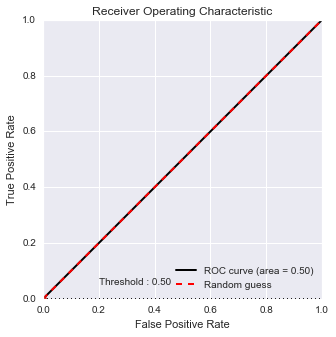

In [35]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo2, label_pred2)

In [36]:
report2 = classification_report(label_test, label_pred2, output_dict=True)
df2 = pd.DataFrame(report2).transpose()
df2.to_excel(writer, sheet_name='Naive Bayes')
writer.save()

## Clasificacion con Support Vector Machine

In [37]:
modelo3 = SVC(kernel='rbf', random_state=0)
modelo3.fit(data_train, label_train)

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
label_pred3 = modelo3.predict(data_test)



MATRIZ DE CONFUSION




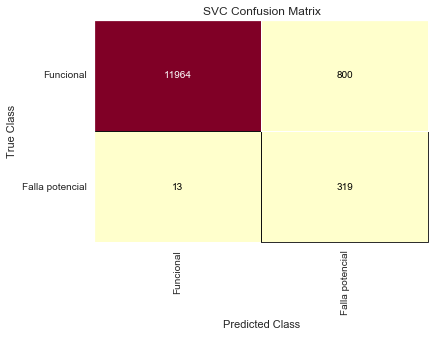



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.937919975565058
ROC AUC: 0.9490835482324157
------------------------------------------------------------
Precisión por clase: [0.99891459 0.28507596]
Sensibilidad - Recall por clase: [0.93732372 0.96084337]
F1 por clase: [0.96713957 0.43969676]
------------------------------------------------------------
F1 Macro: 0.7034181633786678
F1 Micro: 0.937919975565058
F1 Weighted: 0.9537682302830218
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9490835482324157
Sensibilidad - Recall Micro: 0.937919975565058
Sensibilidad - Recall Weighted: 0.937919975565058
------------------------------------------------------------
Precisión Macro: 0.6419952734847838
Precisión Micro: 0.937919975565058
Precisión Weighted: 0.9808178831976194
------------------------------------------------------------
Verdaderos positivos - True Positives: 319
Verdaderos negativos - True Negatives: 11964
Falsos positivos - 

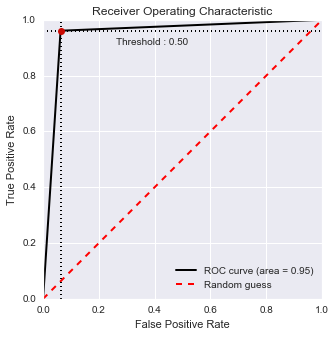

In [39]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo3, label_pred3)

In [40]:
report3 = classification_report(label_test, label_pred3, output_dict=True)
df3 = pd.DataFrame(report3).transpose()
df3.to_excel(writer, sheet_name='SVC')
writer.save()

## Clasificacion Linear SVC

In [41]:
modelo4 = LinearSVC(random_state=0, max_iter=10000)
modelo4.fit(data_train, label_train);
label_pred4 = modelo4.predict(data_test)



MATRIZ DE CONFUSION




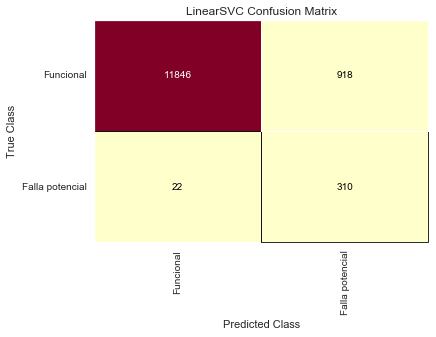



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9282223579718998
ROC AUC: 0.9309069559340465
------------------------------------------------------------
Precisión por clase: [0.99814628 0.252443  ]
Sensibilidad - Recall por clase: [0.92807897 0.93373494]
F1 por clase: [0.96183826 0.3974359 ]
------------------------------------------------------------
F1 Macro: 0.6796370783054771
F1 Micro: 0.9282223579718998
F1 Weighted: 0.9475299525090977
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9309069559340464
Sensibilidad - Recall Micro: 0.9282223579718998
Sensibilidad - Recall Weighted: 0.9282223579718998
------------------------------------------------------------
Precisión Macro: 0.6252946362210153
Precisión Micro: 0.9282223579718998
Precisión Weighted: 0.9792417637404698
------------------------------------------------------------
Verdaderos positivos - True Positives: 310
Verdaderos negativos - True Negatives: 11846
Falsos positiv

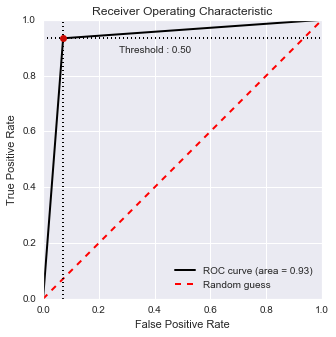

In [42]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo4, label_pred4)

In [43]:
report4 = classification_report(label_test, label_pred4, output_dict=True)
df4 = pd.DataFrame(report4).transpose()
df4.to_excel(writer, sheet_name='linearSVC')
writer.save()

## k-NN KNeighborsClassifier con grid search

In [54]:
model = KNeighborsClassifier()
parameters= {'n_neighbors': np.arange(1, 100, 2)            
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=10, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)


Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   0.8s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.8s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.8s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.8s
[CV] n_neighbors=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 10.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=2)

In [55]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'n_neighbors': 63}
0.961077989433377
31


In [56]:
modelo5= grid.best_estimator_
modelo5.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=63, p=2,
                     weights='uniform')

In [44]:
modelo5= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=63, p=2,
                     weights='uniform')
modelo5.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=63, p=2,
                     weights='uniform')

In [45]:
label_pred5 = modelo5.predict(data_test)



MATRIZ DE CONFUSION




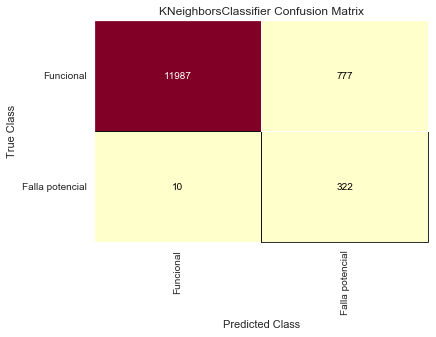



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9399053145998778
ROC AUC: 0.9545025920038663
------------------------------------------------------------
Precisión por clase: [0.99916646 0.29299363]
Sensibilidad - Recall por clase: [0.93912567 0.96987952]
F1 por clase: [0.96821615 0.45003494]
------------------------------------------------------------
F1 Macro: 0.709125543480086
F1 Micro: 0.9399053145998778
F1 Weighted: 0.955079603879679
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9545025920038663
Sensibilidad - Recall Micro: 0.9399053145998778
Sensibilidad - Recall Weighted: 0.9399053145998778
------------------------------------------------------------
Precisión Macro: 0.6460800444272427
Precisión Micro: 0.9399053145998778
Precisión Weighted: 0.9812640927651212
------------------------------------------------------------
Verdaderos positivos - True Positives: 322
Verdaderos negativos - True Negatives: 11987
Falsos positivos

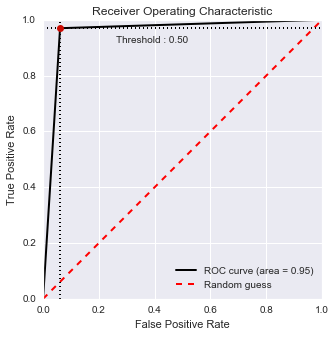

In [46]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo5, label_pred5)

In [47]:
report5 = classification_report(label_test, label_pred5, output_dict=True)
df5 = pd.DataFrame(report5).transpose()
df5.to_excel(writer, sheet_name='KNN')
writer.save()

## Clasificacion con Decision tree con Grid Search

In [62]:
model = tree.DecisionTreeClassifier()
depths = np.arange(1,20)
parameters= {'max_depth' : depths,
             'min_samples_leaf' : [1, 5, 10, 20, 50, 100],
             'criterion': ['entropy', 'gini'],
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=5, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............

[Parallel(n_jobs=1)]: Done 1140 out of 1140 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8, 

In [63]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 20}
0.9532257282729872
33


In [64]:
modelo6= grid.best_estimator_
modelo6.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
modelo6= tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
modelo6.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
label_pred6 = modelo6.predict(data_test)



MATRIZ DE CONFUSION




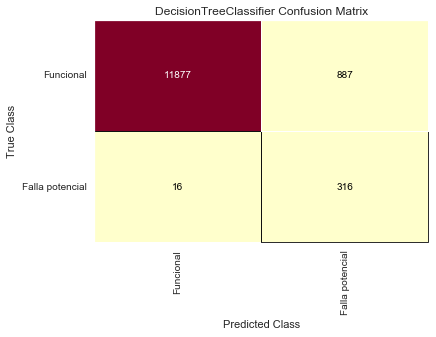



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9310476481368357
ROC AUC: 0.9411574533797993
------------------------------------------------------------
Precisión por clase: [0.99865467 0.26267664]
Sensibilidad - Recall por clase: [0.93050768 0.95180723]
F1 por clase: [0.96337754 0.41172638]
------------------------------------------------------------
F1 Macro: 0.6875519621057586
F1 Micro: 0.9310476481368357
F1 Weighted: 0.9493924922275776
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9411574533797993
Sensibilidad - Recall Micro: 0.9310476481368357
Sensibilidad - Recall Weighted: 0.9310476481368357
------------------------------------------------------------
Precisión Macro: 0.6306656562718879
Precisión Micro: 0.9310476481368357
Precisión Weighted: 0.9799967061189442
------------------------------------------------------------
Verdaderos positivos - True Positives: 316
Verdaderos negativos - True Negatives: 11877
Falsos positiv

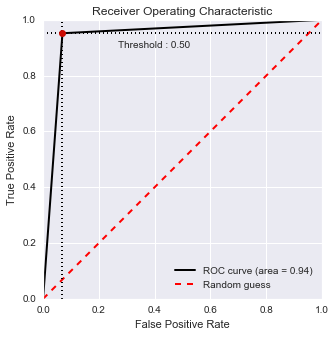

In [51]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo6, label_pred6)

In [52]:
report6 = classification_report(label_test, label_pred6, output_dict=True)
df6 = pd.DataFrame(report6).transpose()
df6.to_excel(writer, sheet_name='Tree')
writer.save()

## Clasificacion por Logistic Regression con Grid Search CV

In [70]:
model = LogisticRegression(solver='liblinear')
c = np.arange(1,20)
parameters= {'C' : c,}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=5, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=2 .............................................................
[CV] .............................................. C=2, total=   0.1s
[CV] C=2 .............................................................
[CV] .............................................. C=2, total=   0.1s
[CV] C=2 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=2)

In [71]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'C': 6}
0.9605448112064369
5


In [72]:
modelo7= grid.best_estimator_
modelo7.fit(data_train, label_train)

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
modelo7= LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
modelo7.fit(data_train, label_train)

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
label_pred7 = modelo7.predict(data_test)



MATRIZ DE CONFUSION




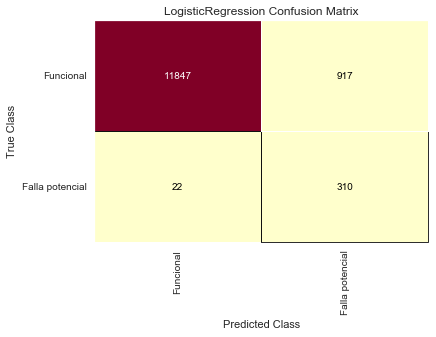



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9282987171655467
ROC AUC: 0.9309461286071896
------------------------------------------------------------
Precisión por clase: [0.99814643 0.25264874]
Sensibilidad - Recall por clase: [0.92815732 0.93373494]
F1 por clase: [0.9618804  0.39769083]
------------------------------------------------------------
F1 Macro: 0.6797856158945716
F1 Micro: 0.9282987171655468
F1 Weighted: 0.9475774920322818
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9309461286071896
Sensibilidad - Recall Micro: 0.9282987171655467
Sensibilidad - Recall Weighted: 0.9282987171655467
------------------------------------------------------------
Precisión Macro: 0.625397584318844
Precisión Micro: 0.9282987171655467
Precisión Weighted: 0.9792471317300645
------------------------------------------------------------
Verdaderos positivos - True Positives: 310
Verdaderos negativos - True Negatives: 11847
Falsos positivo

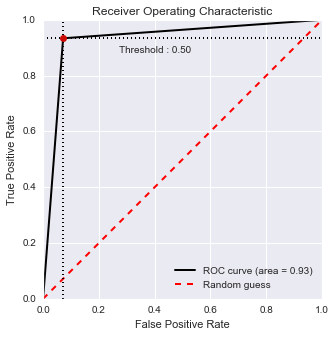

In [55]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo7, label_pred7)

In [56]:
report7 = classification_report(label_test, label_pred7, output_dict=True)
df7 = pd.DataFrame(report7).transpose()
df7.to_excel(writer, sheet_name='LogisticR')
writer.save()

## Clasificacion con red neuronal MLP

In [59]:
modelo8= MLPClassifier(random_state=0)
modelo8.fit(data_train, label_train);
label_pred8 = modelo8.predict(data_test)


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




MATRIZ DE CONFUSION




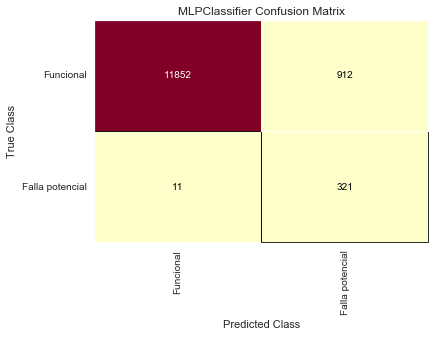



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9295204642638973
ROC AUC: 0.9477082570331467
------------------------------------------------------------
Precisión por clase: [0.99907275 0.26034063]
Sensibilidad - Recall por clase: [0.92854904 0.96686747]
F1 por clase: [0.96252081 0.41022364]
------------------------------------------------------------
F1 Macro: 0.6863722263325365
F1 Micro: 0.9295204642638973
F1 Weighted: 0.9485193856389869
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9477082570331468
Sensibilidad - Recall Micro: 0.9295204642638973
Sensibilidad - Recall Weighted: 0.9295204642638973
------------------------------------------------------------
Precisión Macro: 0.629706689900287
Precisión Micro: 0.9295204642638973
Precisión Weighted: 0.980344962984803
------------------------------------------------------------
Verdaderos positivos - True Positives: 321
Verdaderos negativos - True Negatives: 11852
Falsos positivos

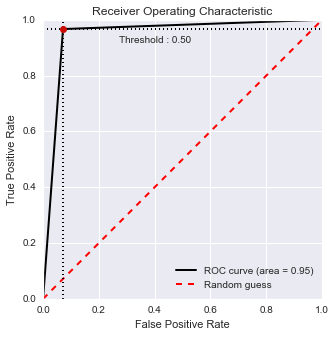

In [60]:
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation(data_train, label_train, data_test, label_test, modelo8, label_pred8)

In [61]:
report8 = classification_report(label_test, label_pred8, output_dict=True)
df8 = pd.DataFrame(report8).transpose()
df8.to_excel(writer, sheet_name='MLP')
writer.save()

## Red neronal MLP con grid search CV

In [83]:
model = MLPClassifier(random_state=0)

parameters= {'learning_rate':["constant", "invscaling", "adaptive"],
             'hidden_layer_sizes':[(8),(2,4),(1,8,1),(1,1,1),(2,8,2),(4,16,4), (1,2,1)],
             'activation': ["identity","logistic", "relu", "tanh"],
             'solver': ["lbfgs", "sgd", "adam"]
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=2, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)


Fitting 2 folds for each of 252 candidates, totalling 504 fits
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   0.8s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=invsca

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   2.2s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   2.2s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   0.7s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   0.8s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 
[CV]  activat

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   2.6s
[CV] activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   2.5s
[CV] activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   1.0s
[CV] activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   1.1s
[CV] activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(1, 8, 1), learning_rate=adapt

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   2.0s
[CV] activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   2.1s
[CV] activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   0.7s
[CV] activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   0.7s
[CV] activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adapt

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   2.8s
[CV] activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   2.7s
[CV] activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam, total=   0.8s
[CV] activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam, total=   0.8s
[CV] activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=adapt

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   2.0s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   2.3s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   2.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd, total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd, total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam, total=   2.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam, total=   2.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd, total=   2.5s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd, total=   2.5s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   2.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   2.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 
[CV]  activat

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   2.5s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   2.8s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 
[CV]  ac

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   3.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   2.9s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   3.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   3.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   1.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   1.4s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=a

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   2.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   2.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   1.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   1.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   2.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   2.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   1.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   1.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   2.8s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   2.8s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=a

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   3.8s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   3.7s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam, total=   3.7s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam, total=   3.8s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   1.5s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   1.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   3.9s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   3.8s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.3s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant,

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   4.2s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   4.3s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   1.3s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd, total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd, total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learni

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam, total=   4.1s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam, total=   4.3s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs, total=   1.3s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   1.5s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   1.5s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adapti

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   4.3s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   4.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   3.4s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   3.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   3.4s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   3.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   1.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   1.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   3.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   3.4s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   1.2s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   1.1s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.1s
[CV] ac

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   2.6s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   2.6s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   1.4s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   1.9s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.2s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.6s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.5s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   1.5s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   1.8s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(1, 8,

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   3.7s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   3.7s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   3.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   3.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   3.6s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   3.6s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   1.6s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   1.6s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   3.5s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   3.6s
[CV] activation=relu, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   3.2s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   3.3s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   3.6s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   3.4s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, 

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   3.4s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   3.3s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   3.8s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   3.3s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidde

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd, total=   3.8s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   3.9s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 
[CV]  activat

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   3.8s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   3.8s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   4.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidde

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   2.9s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   2.9s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   2.6s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   3.1s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solv

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.7s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.2s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   1.4s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   1.3s
[CV

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   2.6s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   2.2s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd, total=   2.0s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd, total=   1.8s
[CV] activati

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam, total=   2.7s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam, total=   2.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd, total=   1.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solve

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   3.2s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   3.1s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   2.7s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   2.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   3.2s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   3.2s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   3.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   3.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd, total=   3.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd, total=   3.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   3.7s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   3.8s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   3.0s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   3.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   3.7s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   3.8s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   3.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   3.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   3.7s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   3.7s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   2.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   2.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   2.8s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   2.8s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   2.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   2.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   2.9s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   2.9s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   2.5s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   2.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   2.9s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   2.9s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   3.4s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   3.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   3.7s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   2.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   3.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   3.4s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam, total=   3.7s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam, total=   2.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   3.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   3.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   3.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   2.5s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.1s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.1s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidde

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   4.1s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   4.0s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   5.0s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   2.8s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   3.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   3.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   4.0s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   3.6s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   3.5s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   4.0s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   3.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   3.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   3.8s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed: 12.9min finished


[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   3.5s
Wall time: 13min 2s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
             iid='warn', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'relu', 'tanh'],
                         'hidden_layer_sizes': [8, (2, 4), (1, 8, 1), (1, 1, 1),
                                                (2, 8, 2), (4, 16, 4),
                                                (

In [84]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'activation': 'logistic', 'hidden_layer_sizes': (4, 16, 4), 'learning_rate': 'constant', 'solver': 'adam'}
0.9599146914836896
110


In [85]:
modelo9= grid.best_estimator_
modelo9.fit(data_train, label_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 16, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [62]:
modelo9= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 16, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
modelo9.fit(data_train, label_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 16, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [63]:
label_pred9 = modelo9.predict(data_test)



MATRIZ DE CONFUSION




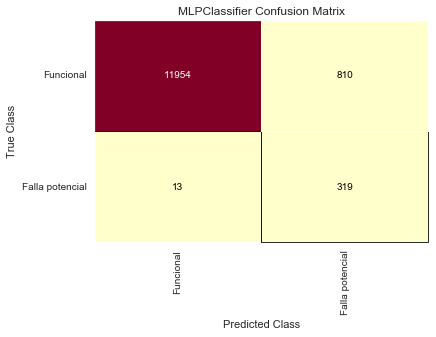



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9371563836285889
ROC AUC: 0.9486918215009835
------------------------------------------------------------
Precisión por clase: [0.99891368 0.28255093]
Sensibilidad - Recall por clase: [0.93654027 0.96084337]
F1 por clase: [0.96672193 0.4366872 ]
------------------------------------------------------------
F1 Macro: 0.7017045642461275
F1 Micro: 0.9371563836285889
F1 Weighted: 0.953284883847568
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9486918215009835
Sensibilidad - Recall Micro: 0.9371563836285889
Sensibilidad - Recall Weighted: 0.9371563836285889
------------------------------------------------------------
Precisión Macro: 0.6407323046556359
Precisión Micro: 0.9371563836285889
Precisión Weighted: 0.980752986496543
------------------------------------------------------------
Verdaderos positivos - True Positives: 319
Verdaderos negativos - True Negatives: 11954
Falsos positivos

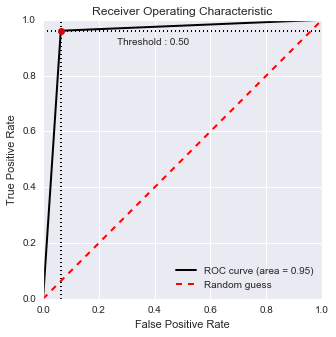

In [64]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo9, label_pred9)

In [65]:
report9 = classification_report(label_test, label_pred9, output_dict=True)
df9 = pd.DataFrame(report9).transpose()
df9.to_excel(writer, sheet_name='MLP 4164')
writer.save()